Import required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
import os
os.chdir('/drive/My Drive/batch45')

Importing Data

In [54]:
Data=pd.read_csv('data.csv')

In [6]:
Data.head(5)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


Size of the data

In [7]:
Data.shape

(2227, 3)

In [8]:
Data['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [13]:
Data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

X1 ranges from -134 t0 134

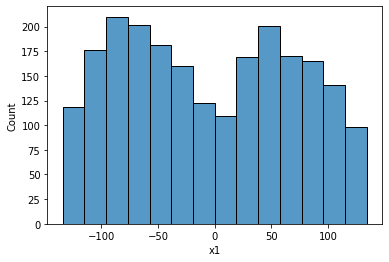

In [9]:
sns.histplot(Data['x1'])

In [11]:
max(Data['x1']),min(Data['x1'])

(134.5086874, -134.3691605)

In [15]:
max(Data['x2']),min(Data['x2'])

(99999999.0, -134.8761321)

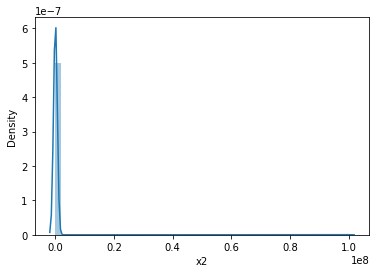

In [16]:
sns.distplot(Data['x2'])

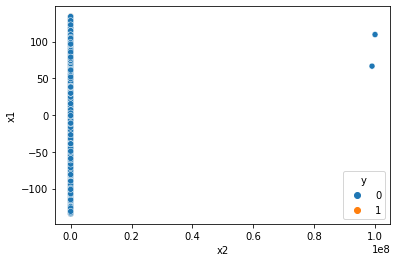

In [18]:
sns.scatterplot(x='x2',y='x1',data=Data,hue='y');

Missing values are very less so I removed those values

In [55]:
final_data = Data.dropna(how = 'any')

In [20]:
final_data.shape

(2219, 3)

In [56]:
final_data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [57]:
final_data.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Pair plot

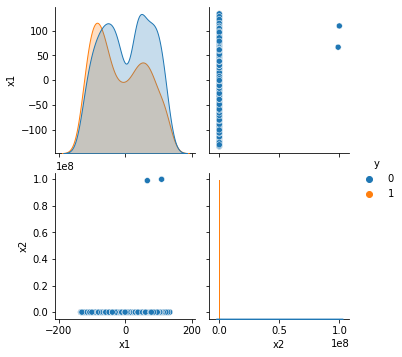

In [24]:
sns.pairplot(Data,hue='y')

Heat map

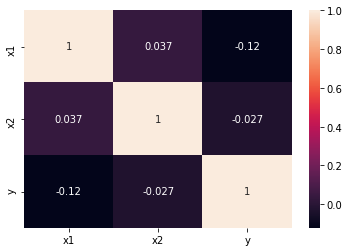

In [25]:
sns.heatmap(Data.corr(),annot=True)

Converting data into standard scale

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
X=final_data[['x1','x2']]
Y=final_data['y']

In [60]:
Data_scale=sc.fit_transform(X)

In [119]:
Data_scale

array([[-1.52953452e+00, -2.99941733e-02],
       [-1.28583072e+00, -2.99999411e-02],
       [-1.67518040e+00, -2.99969302e-02],
       ...,
       [ 1.20720924e+00, -2.99979109e-02],
       [ 1.11758091e+00, -3.00063617e-02],
       [ 1.52687860e+00,  3.34595047e+01]])

Converting scaled data into data frame

In [61]:
Scale_data=pd.DataFrame(Data_scale)


In [62]:
Scale_data

,0,1
0,-1.529535,-0.029994
1,-1.285831,-0.030000
2,-1.675180,-0.029997
3,-1.467293,-0.029999
4,-1.529535,-0.029994
...,...,...
2214,1.381261,-0.030003
2215,1.353488,-0.030002
2216,1.207209,-0.029998
2217,1.117581,-0.030006


spliting of data

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(Scale_data,Y,random_state=50)

Up sampling

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
sm=SMOTE(k_neighbors=3,random_state=10)

In [74]:
X_res,Y_res=sm.fit_sample(Scale_data,Y.ravel())

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=50)

In [76]:
model=lr.fit(X_train,Y_train)

In [77]:
predict=model.predict(X_test)

In [78]:
accuracy_score(Y_test,predict)

0.5289367429340511

Model building

In [104]:
def model(model,x_train,y_train,x_test,y_test):
  m=model
  final_model=m.fit(x_train,y_train)
  y_predict=final_model.predict(x_test)
  y_train_predict=final_model.predict(x_train)
  print("train accuracy",accuracy_score(y_train,y_train_predict))
  print("test accuracy",accuracy_score(y_test,y_predict))
  print(roc_auc_score(y_test,y_predict))


In [105]:
model(LogisticRegression(),X_train,Y_train,X_test,Y_test)

train accuracy 0.5883413461538461
test accuracy 0.5801801801801801
0.5537698412698413


In [117]:
model(SVC(kernel='rbf'),X_train,Y_train,X_test,Y_test)

train accuracy 0.5847355769230769
test accuracy 0.581981981981982
0.5518849206349207


In [116]:
model(SVC(kernel='linear'),X_train,Y_train,X_test,Y_test)

train accuracy 0.5546875
test accuracy 0.5675675675675675
0.5


In [92]:
model(DecisionTreeClassifier(),X_train,Y_train,X_test,Y_test)

train accuracy 1.0
test accuracy 0.9315315315315316
0.9322420634920635


In [118]:
model(KNeighborsClassifier(),X_train,Y_train,X_test,Y_test)

train accuracy 0.7097355769230769
test accuracy 0.5333333333333333
0.5308531746031746


KNN Hyper parameter tunning

In [101]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


SVC optimizer

In [122]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
svc=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf','linear']}  
 
grid = RandomizedSearchCV(svc, param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=linear, gamma=0.0001, C=1 ................................
[CV] .... kernel=linear, gamma=0.0001, C=1, score=0.556, total=   0.0s
[CV] kernel=linear, gamma=0.0001, C=1 ................................
[CV] .... kernel=linear, gamma=0.0001, C=1, score=0.556, total=   0.0s
[CV] kernel=linear, gamma=0.0001, C=1 ................................
[CV] .... kernel=linear, gamma=0.0001, C=1, score=0.556, total=   0.0s
[CV] kernel=linear, gamma=0.0001, C=1 ................................
[CV] .... kernel=linear, gamma=0.0001, C=1, score=0.553, total=   0.0s
[CV] kernel=linear, gamma=0.0001, C=1 ................................
[CV] .... kernel=linear, gamma=0.0001, C=1, score=0.554, total=   0.0s
[CV] kernel=rbf, gamma=0.001, C=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... kernel=rbf, gamma=0.001, C=100, score=0.556, total=   0.1s
[CV] kernel=rbf, gamma=0.001, C=100 ..................................
[CV] ...... kernel=rbf, gamma=0.001, C=100, score=0.556, total=   0.1s
[CV] kernel=rbf, gamma=0.001, C=100 ..................................
[CV] ...... kernel=rbf, gamma=0.001, C=100, score=0.556, total=   0.1s
[CV] kernel=rbf, gamma=0.001, C=100 ..................................
[CV] ...... kernel=rbf, gamma=0.001, C=100, score=0.553, total=   0.1s
[CV] kernel=rbf, gamma=0.001, C=100 ..................................
[CV] ...... kernel=rbf, gamma=0.001, C=100, score=0.554, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ........ kernel=rbf, gamma=0.1, C=0.1, score=0.556, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ........ kernel=rbf, gamma=0.1, C=0.1, score=0.556, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [ ]:
model(SVC(kernel='linear'),X_train,Y_train,X_test,Y_test)

Decisiontree Hyper parameter tunning


In [112]:

dt=DecisionTreeClassifier()
X, y = make_classification(n_samples=100,
                          n_features=10,
                          n_informative=3,
                          n_redundant=0,
                          n_repeated=0,
                          n_classes=2,
                          random_state=0,
                          shuffle=False)




param_grid = {
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['gini', 'entropy']

   
}

CV_rfc = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,Y_train)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


Final model with best params


In [114]:
model(DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features='sqrt'),X_train,Y_train,X_test,Y_test)

train accuracy 0.9501201923076923
test accuracy 0.9225225225225225
0.9243055555555555


##Conclusion
Decision tree is best for this data